# Домашнее задание 1
## Sentiment Analysis in English

*deadline*: 1 октября 2024, 23:59

В этом домашнем задании вы будете работать с корпусом текстов на английском языке. Корпус описан и представлен по ссылке: https://www.kaggle.com/datasets/sbhatti/financial-sentiment-analysis.


## ПРАВИЛА
1. Домашнее задание выполняется в группе до 4-х человек.
2. Домашнее задание оформляется в виде отчета в jupyter-тетрадке.
3. Отчет должен содержать: имена всех членов группы, нумерацию заданий и пунктов, которые вы выполнили, код решения, и понятное пошаговое описание того, что вы сделали.
4. Отчеты, состоящие исключительно из кода, не будут проверены и будут автоматически оценены нулевой оценкой.
5. Плагиат и любое недобросовестное цитирование приводит к обнулению оценки.
6. За каждую неделю просрочки после дедлайна начисляет по 1 штрафному баллу (например, при дедлайне 01.10.24 в 23:59 сдача ДЗ 12.10.24 ведёт к 2 штрафным баллам).
7. Бонусные баллы позволяют повысить общую оценку за ДЗ до максимальной (если были ошибки или недочеты, повлекшие снижение баллов).


:**Сюда нужно будет написать кто что конкретно выполнил:
Алимханов Карим, Пономарева Ольга**



## Часть 1. [2 балла] Эксплоративный анализ
1. Найдите топ-300 слов по частоте без учета стоп-слов.
2. Найдите топ слов, характеризующих каждую тональность отдельно.

[бонус] Найдите еще что-то интересное в корпусе (что-то специфичное для данной темы)


In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [2]:
df = pd.read_csv('data.csv')
df.head(5)

,Sentence,Sentiment
0,The GeoSolutions technology will leverage Bene...,positive
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative
2,"For the last quarter of 2010 , Componenta 's n...",positive
3,According to the Finnish-Russian Chamber of Co...,neutral
4,The Swedish buyout firm has sold its remaining...,neutral


In [3]:
def clean_sentence(sentence):
    # Удаление ссылок
    sentence = re.sub(r'http\S+', '', sentence)
    # Удаление специальных символов
    sentence = re.sub(r'[^\w\s]', '', sentence)
    # Уменьшение размера шрифта
    sentence = sentence.lower()
    return sentence

In [4]:
df['Sentence'] = df['Sentence'].apply(clean_sentence)
df

,Sentence,Sentiment
0,the geosolutions technology will leverage bene...,positive
1,esi on lows down 150 to 250 bk a real possibility,negative
2,for the last quarter of 2010 componenta s net...,positive
3,according to the finnishrussian chamber of com...,neutral
4,the swedish buyout firm has sold its remaining...,neutral
...,...,...
5837,rising costs have forced packaging producer hu...,negative
5838,nordic walking was first used as a summer trai...,neutral
5839,according shipping company viking line the eu...,neutral
5840,in the building and home improvement trade sa...,neutral


In [5]:

from collections import Counter
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [6]:
def create_corpus(df):
    noise = set(stopwords.words('english'))
    corpus = []
    for _, row in df.iterrows():
        cleaned_sentence = row['Sentence']
        tokens = word_tokenize(cleaned_sentence)
        filtered_tokens = [token for token in tokens if token.isalpha() and token not in noise]
        corpus.extend(filtered_tokens)
    return corpus

corpus = create_corpus(df)

print(f'Длина корпуса: {len(corpus)}')


Длина корпуса: 64276


In [7]:
from collections import Counter

def sorted_frequency(corpus):
    freq_dict = Counter(corpus)
    freq_dict_sorted = sorted(freq_dict.items(), key=lambda x: -x[1])
    return [item[0] for item in freq_dict_sorted], dict(freq_dict_sorted)

sorted_freq = sorted_frequency(corpus)[0]
print('Number of unique words:', len(sorted_freq))
top300 = sorted_freq[:300]
print('Top frequency')
print('Len:', len(top300))
print('Top 300 words:')
for word in top300[:10]:
    print(f'{word}: {corpus.count(word)}')


Number of unique words: 10315
Top frequency
Len: 300
Top 300 words:
eur: 1284
company: 809
mn: 729
profit: 568
sales: 560
finnish: 527
said: 516
net: 499
million: 493
operating: 371


In [8]:
corpus_positive = create_corpus(df[df.Sentiment == 'positive'])
corpus_negative = create_corpus(df[df.Sentiment == 'negative'])

top_positive, freq_positive = sorted_frequency(corpus_positive)
top_negative, freq_negative = sorted_frequency(corpus_negative)

print('Positive:', top_positive[:20])
print('Negative:', top_negative[:20])

Positive: ['eur', 'mn', 'sales', 'company', 'profit', 'net', 'said', 'finnish', 'million', 'year', 'period', 'mln', 'operating', 'quarter', 'group', 'new', 'rose', 'increased', 'oyj', 'share']
Negative: ['eur', 'mn', 'profit', 'sales', 'net', 'finnish', 'operating', 'company', 'million', 'period', 'quarter', 'loss', 'year', 'mln', 'said', 'compared', 'decreased', 'first', 'share', 'oyj']


## Часть 2. [2 балла] Модели представления слов
Обучите модель представления слов (word2vec, GloVe, fastText или любую другую) на материале корпуса.
1. Продемонстрируйте, как работает поиск синонимов, ассоциаций, лишних слов в обученной модели.
2. Визуализируйте топ-300 слов по частоте без учета стоп-слов (п. 1.1) с помощью TSNE или UMAP (https://umap-learn.readthedocs.io).


In [9]:
import gensim
import string

from gensim.models import word2vec

In [10]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Загрузка стоп-слов
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# Очистка данных
def create_corpus_version3(df):
    corpus = []
    for sentence in df.Sentence:
        temp = []
        tokens = word_tokenize(sentence)
        for token in tokens:
            token = token.lower()  # Лемматизация и приведение к нижнему регистру
            if token not in stop_words and token.isalpha():  # Удаляем стоп-слова и оставляем только алфавитные символы
                temp.append(token)
        corpus.append(temp)
    return corpus

sentences = create_corpus_version3(df)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [11]:
model = word2vec.Word2Vec(sentences,
                          workers=4,
                          vector_size=100,  # Уменьшим размер вектора для скорости
                          min_count=5,  # Увеличим минимальный порог для отсева редких слов
                          window=5,  # Оптимальный размер окна для локальных контекстов
                          sample=1e-5,  # Уменьшим частоту семплирования для частых слов
                          sg=0,  # Используем CBOW для ускорения обучения
                          negative=10,  # Увеличим количество негативных примеров
                          ns_exponent=0.75,
                          alpha=0.025,  # Более стандартная скорость обучения
                          min_alpha=0.0001,  # Поддерживаем минимальную скорость обучения ниже
                          epochs=30)


In [12]:
model.save("word2vec.model")

In [13]:
# ассоциации
print("Ассоциации:")
print("company - loss + profit = ", ', '.join([word for word, sim in model.wv.most_similar(positive=["company", "profit"], negative=["loss"], topn=3)]))
print("share - decrease + growth = ", ', '.join([word for word, sim in model.wv.most_similar(positive=["share", "growth"], negative=["decrease"], topn=3)]))
print("market - debt + investment = ", ', '.join([word for word, sim in model.wv.most_similar(positive=["market", "investment"], negative=["debt"], topn=3)]))

# синонимы
print("Синонимы:")
print("decrease - ", ', '.join([word for word, sim in model.wv.most_similar('decrease', topn=3)]))
print("increase - ", ', '.join([word for word, sim in model.wv.most_similar('increase', topn=3)]))
print("money - ", ', '.join([word for word, sim in model.wv.most_similar('money', topn=3)]))

# Лишние слова (Odd-word-out) для бизнес-тематики
print("Лишние слова:")
print("company, profit, market - ", model.wv.doesnt_match("company profit market".split()))
print("investment, debt, revenue - ", model.wv.doesnt_match("investment debt revenue".split()))
print("growth, profit, failure - ", model.wv.doesnt_match("growth profit failure".split()))


Ассоциации:
company - loss + profit =  technology, corporate, russia
share - decrease + growth =  analyses, total, pohjola
market - debt + investment =  media, news, long
Синонимы:
decrease -  solutions, management, ltd
increase -  company, finland, oy
money -  company, oy, finland
Лишние слова:
company, profit, market -  profit
investment, debt, revenue -  debt
growth, profit, failure -  growth


In [14]:
!pip install umap-learn


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 4.2 MB/s eta 0:00:00


ВИЗУАЛИЗАЦИЯ

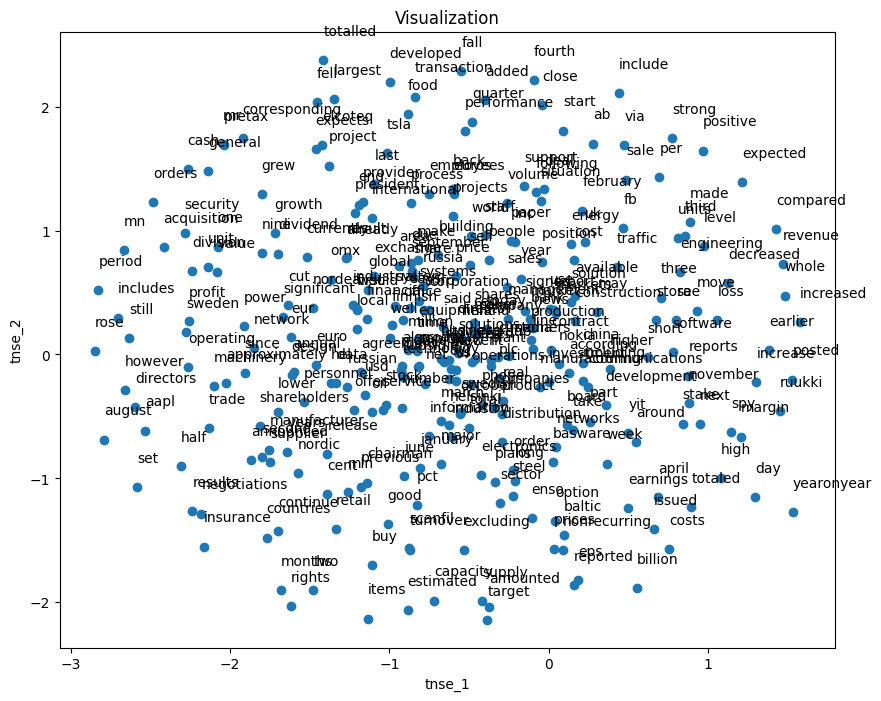

In [15]:
from sklearn.manifold import TSNE
import pandas as pd
import numpy as np

selected_words_vector = []
filtered_selected_words = []
for word in top300:
    if word in model.wv:
        selected_words_vector.append(model.wv[word])
        filtered_selected_words.append(word)  # Добавляем только те слова, которые есть в модели

selected_words_vector = np.array(selected_words_vector)

# Применение TSNE с изменёнными параметрами
# Увеличиваем количество итераций для лучшей сходимости и изменяем perplexity
tsne_result = TSNE(n_components=2,
                     random_state=42,
                     perplexity=40,
                     metric='correlation'
                    ).fit_transform(selected_words_vector)

tsne_dataframe = pd.DataFrame(tsne_result, columns=['x', 'y'])
tsne_dataframe['word'] = filtered_selected_words  # Используем отфильтрованный список слов

plt.figure(figsize=(10, 8))
plt.scatter(tsne_dataframe.x, tsne_dataframe.y)
for i in range(tsne_dataframe.shape[0]):
    plt.annotate(tsne_dataframe.word[i], (tsne_dataframe.x[i], tsne_dataframe.y[i] + 0.2))
plt.title("Visualization")
plt.xlabel("tnse_1")
plt.ylabel("tnse_2")
plt.show()

## Часть 3. [5 баллов] Классификация текстов
В этой задаче требуется по тексту (Sentence в датасете) предсказать его тональность (Sentiment в датасете). Основная мера качества – macro $F_1$.

Обучите несколько классификаторов и сравните их между собой. Оцените качество классификаторов на каждом из классв. Какие классы чаще всего оказываются перепутаны? Связаны ли ошибки со смыслом текстов?

0. [0 баллов] Разбейте корпус на три выборки: обучающую, отладочную и тестовую в соотношении 80 %, 10 % и 10 %. Тестовая выборка должна использоваться исключительно для тестирования моделей, обучающая и отладочная — для выбора модели и параметров.
1. [1 балл] Используйте fastText в качестве baseline-классификатора.
2. [2 балла] Используйте сверточные сети в качестве более продвинутого классификатора. Поэкспериментируйте с количеством и размерностью фильтров, используйте разные размеры окон, попробуйте использовать $k$-max pooling.
3. [2 балла] Попробуйте расширить обучающее множество за счет аугментации данных. Если вам понадобится словарь синонимов, можно использовать WordNet (ниже вы найдете примеры).

[бонус] Используйте ваш любимый классификатор и любые (честные) способы повышения качества классификации и получите macro $F_1$ больше бейслайна.



In [16]:
! git clone https://github.com/facebookresearch/fastText.git
! pip3 install fastText/.

Cloning into 'fastText'...
remote: Enumerating objects: 3998, done.
remote: Counting objects: 100% (1057/1057), done.
remote: Compressing objects: 100% (196/196), done.
remote: Total 3998 (delta 922), reused 884 (delta 856), pack-reused 2941 (from 1)
Receiving objects: 100% (3998/3998), 8.30 MiB | 9.55 MiB/s, done.
Resolving deltas: 100% (2529/2529), done.
Processing ./fastText
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached pybind11-2.13.6-py3-none-any.whl.metadata (9.5 kB)
Using cached pybind11-2.13.6-py3-none-any.whl (243 kB)
  Created wheel for fasttext: filename=fasttext-0.9.2-cp310-cp310-linux_x86_64.whl size=4296147 sha256=8b3318635d15544198819c4a0134e33e28f57571a027411a17248e72eaca0785
  Stored in directory: /tmp/pip-ephem-wheel-cache-9xqu9f68/wheels/8b/05/af/3cfae069d904597d44b309c956601b611bdf8967bcbe968903
Successfully built fasttext


In [17]:
from sklearn import metrics
import fasttext
import os
import torch
from collections import defaultdict
from tqdm import tqdm_notebook
from sklearn.model_selection import train_test_split
from sklearn.utils import resample

In [18]:
train_data, temp_data = train_test_split(df, test_size=0.2, stratify=df['Sentiment'], random_state=42)
val_data, test_data = train_test_split(temp_data, test_size=0.5, stratify=temp_data['Sentiment'], random_state=42)

# Разделение данных на нейтральные, положительные и отрицательные примеры
neutral = train_data[train_data['Sentiment'] == 'neutral']
positive = train_data[train_data['Sentiment'] == 'positive']
negative = train_data[train_data['Sentiment'] == 'negative']

# Оверсэмплить положительные и отрицательные примеры до количества нейтральных
max_size = len(neutral)
positive_upsampled = resample(positive, replace=True, n_samples=max_size, random_state=42)
negative_upsampled = resample(negative, replace=True, n_samples=max_size, random_state=42)
train_data = pd.concat([neutral, positive_upsampled, negative_upsampled]).sample(frac=1, random_state=42)

# Функция для подготовки данных в формате FastText
def prepare_fasttext_format(data, file_path):
    with open(file_path, 'w') as f:
        for _, row in data.iterrows():
            f.write(f'__label__{row["Sentiment"]} {row["Sentence"]}\n')

# Подготовка файлов для обучения модели FastText
prepare_fasttext_format(train_data, 'train_fasttext.txt')
prepare_fasttext_format(val_data, 'val_fasttext.txt')
prepare_fasttext_format(test_data, 'test_fasttext.txt')

ft_model = fasttext.train_supervised(input='train_fasttext.txt')

# Функция оценки модели FastText
def evaluate_fasttext(model, file_path):
    result = model.test(file_path)
    print(f'Точность: {result[1]}, Полнота: {result[2]}, F1 (Макрос): {result[1] * result[2] * 2 / (result[1] + result[2])}')

print('Результаты на валидационной выборке:')
evaluate_fasttext(ft_model, 'val_fasttext.txt')

print('Результаты на тестовой выборке:')
evaluate_fasttext(ft_model, 'test_fasttext.txt')


Результаты на валидационной выборке:
Точность: 0.6763698630136986, Полнота: 0.6763698630136986, F1 (Макрос): 0.6763698630136986
Результаты на тестовой выборке:
Точность: 0.705982905982906, Полнота: 0.705982905982906, F1 (Макрос): 0.705982905982906


2. [2 балла] Используйте сверточные сети в качестве более продвинутого классификатора. Поэкспериментируйте с количеством и размерностью фильтров, используйте разные размеры окон, попробуйте использовать  k -max pooling.

In [19]:
'''URL = "http://nlp.stanford.edu/data/glove.840B.300d.zip"
FILE = "GloVeVectors"

if os.path.isdir(FILE):
    print("GloVe Vectors already downloaded.")
else:
    !wget -P $FILE $URL
    !unzip $FILE/glove.840B.300d.zip -d $FILE
    '''

'URL = "http://nlp.stanford.edu/data/glove.840B.300d.zip"\nFILE = "GloVeVectors"\n\nif os.path.isdir(FILE):\n    print("GloVe Vectors already downloaded.")\nelse:\n    !wget -P $FILE $URL\n    !unzip $FILE/glove.840B.300d.zip -d $FILE\n    '

In [20]:

!wget -P GloVeVectors http://nlp.stanford.edu/data/glove.840B.300d.zip
!unzip GloVeVectors/glove.840B.300d.zip -d GloVeVectors


--2024-10-10 14:37:08--  http://nlp.stanford.edu/data/glove.840B.300d.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.840B.300d.zip [following]
--2024-10-10 14:37:08--  https://nlp.stanford.edu/data/glove.840B.300d.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.840B.300d.zip [following]
--2024-10-10 14:37:08--  https://downloads.cs.stanford.edu/nlp/data/glove.840B.300d.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2176768927 (2.0G) [application/

In [21]:
import os
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import numpy as np
from tqdm.notebook import tqdm_notebook
from sklearn.model_selection import train_test_split
from torch.utils.data import TensorDataset, DataLoader

# Функция токенизации текстов
def tokenize_texts(texts):
    # Создаем словарь для индексации слов и максимальную длину текста
    max_length = 0
    tokenized_texts = []
    word_to_index = {'<pad>': 0, '<unk>': 1}
    index = 2

    # Для каждого текста: разделяем на слова, создаем список токенов и обновляем словарь
    for text in texts:
        tokenized_text = text.split()
        tokenized_texts.append(tokenized_text)
        for token in tokenized_text:
            if token not in word_to_index:
                word_to_index[token] = index
                index += 1
        max_length = max(max_length, len(tokenized_text))

    return tokenized_texts, word_to_index, max_length

# Функция кодирования токенизированных текстов в индексы слов
def encode_tokenized_texts(tokenized_texts, word_to_index, max_length):
    input_ids = []
    for tokenized_text in tokenized_texts:
        # Добавляем паддинги для достижения максимальной длины
        tokenized_text += ['<pad>'] * (max_length - len(tokenized_text))
        # Преобразуем слова в их индексы
        input_id = [word_to_index.get(token, word_to_index['<unk>']) for token in tokenized_text]
        input_ids.append(input_id)
    return np.array(input_ids, dtype=np.int32)

# Функция загрузки векторов GloVe
def load_glove_vectors(word_to_index, filename):
    # Инициализируем случайные вектора для неизвестных слов
    embeddings = np.random.uniform(-0.25, 0.25, (len(word_to_index), 300))
    embeddings[word_to_index['<pad>']] = np.zeros((300,))

    # Читаем файл GloVe и заполняем векторами известных слов
    with open(filename, 'r', encoding='utf-8') as f:
        count = 0
        for line in tqdm_notebook(f):
            tokens = line.split()
            word = tokens[0]
            try:
                if word in word_to_index:
                    count += 1
                    embeddings[word_to_index[word]] = np.array(tokens[1:], dtype=np.float32)
            except ValueError:
                print(f"Пропуск недействительной строки для слова: {word}")
                continue

    print(f"Найдено {count} векторов GloVe из {len(word_to_index)}.")
    return embeddings

# Разделение данных на обучающую, валидационную и тестовые наборы
train_sentences, train_labels = train_data['Sentence'], train_data['Sentiment']
dev_sentences, dev_labels = df['Sentence'], df['Sentiment']
test_sentences, test_labels = test_data['Sentence'], test_data['Sentiment']

print("Токенизация...")
tokenized_texts_train, word_to_index, max_length = tokenize_texts(list(train_sentences))
tokenized_texts_dev, _, _ = tokenize_texts(list(dev_sentences))
tokenized_texts_test, _, _ = tokenize_texts(list(test_sentences))

all_texts = list(train_sentences) + list(dev_sentences) + list(test_sentences)
tokenized_texts_all, _, max_length_all = tokenize_texts(all_texts)

# Кодируем токенизированные тексты в индексы слов
train_inputs = encode_tokenized_texts(tokenized_texts_train, word_to_index, max_length_all)
dev_inputs = encode_tokenized_texts(tokenized_texts_dev, word_to_index, max_length_all)
test_inputs = encode_tokenized_texts(tokenized_texts_test, word_to_index, max_length_all)

# Загружаем векторы GloVe и конвертируем их в PyTorch тензор
embeddings = load_glove_vectors(word_to_index, "GloVeVectors/glove.840B.300d.txt")
embeddings = torch.tensor(embeddings)

def sentiment_to_label(sentiment):
    # Преобразование меток sentiments в числовые значения
    if sentiment == 'positive':
        return 2
    elif sentiment == 'neutral':
        return 1
    else:
        return 0

train_labels = [sentiment_to_label(label) for label in train_labels]
dev_labels = [sentiment_to_label(label) for label in dev_labels]
test_labels = [sentiment_to_label(label) for label in test_labels]

# Преобразуем данные в PyTorch тензоры
train_inputs, dev_inputs, test_inputs, train_labels, dev_labels, test_labels = \
    tuple(torch.tensor(data) for data in [train_inputs, dev_inputs, test_inputs, train_labels, dev_labels, test_labels])

batch_size = 50
train_dataset = TensorDataset(train_inputs, train_labels)
train_dataloader = DataLoader(train_dataset, shuffle=True, batch_size=batch_size)

dev_dataset = TensorDataset(dev_inputs, dev_labels)
validation_dataloader = DataLoader(dev_dataset, shuffle=False, batch_size=batch_size)

test_dataset = TensorDataset(test_inputs, test_labels)
test_dataloader = DataLoader(test_dataset, shuffle=False, batch_size=batch_size)

class CNN_NLP(nn.Module):
    def __init__(self, pretrained_embedding=None, freeze_embedding=False, vocab_size=None, embed_dim=300,
                 filter_sizes=[3, 4, 5], num_filters=[100, 100, 100], kmax=[1, 1, 1], num_classes=3, dropout=0.5):
        super(CNN_NLP, self).__init__()

        # Инициализация слоев Embedding
        if pretrained_embedding is not None:
            self.vocab_size, self.embed_dim = pretrained_embedding.shape
            self.embedding = nn.Embedding.from_pretrained(pretrained_embedding, freeze=freeze_embedding)
        else:
            self.embed_dim = embed_dim
            self.embedding = nn.Embedding(num_embeddings=vocab_size, embedding_dim=self.embed_dim, padding_idx=0)

        # Создание списка конволюционных слоев
        self.conv1d_list = nn.ModuleList([
            nn.Conv1d(in_channels=self.embed_dim, out_channels=num_filters[i], kernel_size=filter_sizes[i])
            for i in range(len(filter_sizes))
        ])

        # Создание полносвязного слоя для выхода
        self.fc = nn.Linear(np.sum(num_filters) * kmax[0], num_classes)
        self.dropout = nn.Dropout(p=dropout)
        self.kmax_list = kmax

    # Метод для подсчета K-max pooling
    def count_kmax(self, x, k, dim=2):
        index = x.topk(k, dim=dim)[1].sort(dim=dim)[0]
        return x.gather(dim, index)

    # Метод forward для передачи данных через модель
    def forward(self, input_ids):
        x_embed = self.embedding(input_ids).float()
        x_reshaped = x_embed.permute(0, 2, 1)
        x_conv_list = [F.relu(conv1d(x_reshaped)) for conv1d in self.conv1d_list]
        x_pool_list = [self.count_kmax(x_conv, self.kmax_list[i]) for i, x_conv in enumerate(x_conv_list)]
        x_fc = torch.cat([torch.flatten(x_pool, start_dim=1) for x_pool in x_pool_list], dim=1)
        logits = self.fc(self.dropout(x_fc))
        return logits

def initialize_model(pretrained_embedding=None, freeze_embedding=False, vocab_size=None, embed_dim=300,
                       filter_sizes=[3, 4, 5], num_filters=[100, 100, 100], kmax=[1, 1, 1], num_classes=3, dropout=0.5,
                       learning_rate=0.01):
    cnn_model = CNN_NLP(pretrained_embedding=pretrained_embedding, freeze_embedding=freeze_embedding,
                          vocab_size=vocab_size, embed_dim=embed_dim, filter_sizes=filter_sizes, num_filters=num_filters,
                          kmax=kmax, num_classes=num_classes, dropout=dropout)
    cnn_model.to(torch.device("cpu"))
    optimizer = optim.Adadelta(cnn_model.parameters(), lr=learning_rate, rho=0.95)
    return cnn_model, optimizer

cnn_model, optimizer = initialize_model(pretrained_embedding=embeddings, freeze_embedding=False,
                                       vocab_size=None, embed_dim=300, filter_sizes=[3, 4, 5],
                                       num_filters=[100, 100, 100], kmax=[1, 1, 1], num_classes=3,
                                       dropout=0.5, learning_rate=0.01)


Токенизация...


0it [00:00, ?it/s]

Пропуск недействительной строки для слова: at
Пропуск недействительной строки для слова: to
Пропуск недействительной строки для слова: email
Пропуск недействительной строки для слова: or
Пропуск недействительной строки для слова: contact
Пропуск недействительной строки для слова: on
Пропуск недействительной строки для слова: by
Пропуск недействительной строки для слова: in
Пропуск недействительной строки для слова: at
Пропуск недействительной строки для слова: at
Пропуск недействительной строки для слова: is
Найдено 8552 векторов GloVe из 10543.


In [22]:
import random
import time
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn import metrics
from tabulate import tabulate

loss_function = nn.CrossEntropyLoss()

def set_random_seed(random_seed=42):
    random.seed(random_seed)
    np.random.seed(random_seed)
    torch.manual_seed(random_seed)
    torch.cuda.manual_seed_all(random_seed)

def train(model, optimizer, training_loader, validation_loader=None, epochs=10):
    best_f1_score = 0
    all_validation_losses, all_validation_scores = [], []

    for epoch_i in range(epochs):
        total_loss = 0
        model.train()

        for batch_index, batch in enumerate(training_loader):
            input_ids, labels = tuple(t.to(torch.device("cpu")) for t in batch)
            model.zero_grad()
            logits = model(input_ids)
            loss = loss_function(logits, labels)
            total_loss += loss.item()
            loss.backward()
            optimizer.step()

        avg_training_loss = total_loss / len(training_loader)

        if validation_loader is not None:
            validation_loss, validation_f1_score = evaluate(model, validation_loader)
            all_validation_losses.append(validation_loss)
            all_validation_scores.append(validation_f1_score)
            if validation_f1_score > best_f1_score:
                best_f1_score = validation_f1_score

    return all_validation_losses, all_validation_scores, best_f1_score

def evaluate(model, validation_loader):
    model.eval()
    validation_f1_scores = []
    validation_losses = []

    for batch in validation_loader:
        input_ids, labels = tuple(t.to(torch.device("cpu")) for t in batch)
        with torch.no_grad():
            logits = model(input_ids)
        loss = loss_function(logits, labels)
        validation_losses.append(loss.item())
        predictions = torch.argmax(logits, dim=1).flatten()
        f1_score = metrics.f1_score(labels.cpu(), predictions.cpu(), average='macro')
        validation_f1_scores.append(f1_score)

    validation_loss = np.mean(validation_losses)
    validation_f1_score = np.mean(validation_f1_scores)

    return validation_loss, validation_f1_score

set_random_seed(42)
epochs = 5

window_sizes = [[2, 3, 4], [3, 4, 5], [2, 4, 6], [2, 6, 7], [6, 7, 8]]

best_scores_window_sizes = []
results_table = []

for window in window_sizes:
    cnn_model, optimizer = initialize_model(pretrained_embedding=embeddings,
                                            freeze_embedding=False,
                                            filter_sizes=window,
                                            num_filters=[10] * len(window),
                                            kmax=[1] * len(window),
                                            learning_rate=0.25,
                                            dropout=0.5)

    validation_losses_window_size, validation_scores_window_size, best_score_window_size = train(cnn_model, optimizer, train_dataloader, validation_dataloader, epochs=epochs)
    best_scores_window_sizes.append(best_score_window_size)

    results_table.append([str(window), best_score_window_size])

    if best_score_window_size > max(best_scores_window_sizes):
        torch.save(cnn_model, 'best_model_window_size.pt')

print("\nFinal Results:")
print(tabulate(results_table, headers=["Window Sizes", "Best F1-score"], tablefmt="grid"))



Final Results:
+----------------+-----------------+
| Window Sizes   |   Best F1-score |
+================+=================+
| [2, 3, 4]      |        0.769669 |
+----------------+-----------------+
| [3, 4, 5]      |        0.789409 |
+----------------+-----------------+
| [2, 4, 6]      |        0.786035 |
+----------------+-----------------+
| [2, 6, 7]      |        0.79422  |
+----------------+-----------------+
| [6, 7, 8]      |        0.800417 |
+----------------+-----------------+


In [23]:
import random
import time
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn import metrics
from tabulate import tabulate

set_random_seed(42)
filtersizes = [[5], [5, 5], [5, 5, 5]]

best_scores_filtersizes = []
results_table = []
max_best_score = 0

for filter_size in filtersizes:
    cnn_non_static, optimizer = initialize_model(pretrained_embedding=embeddings,
                                                freeze_embedding=False,
                                                filter_sizes=filter_size,
                                                num_filters=[2 for _ in range(len(filter_size))],
                                                kmax=[1 for _ in range(len(filter_size))],
                                                learning_rate=0.25,
                                                dropout=0.5)

    val_losses_filtersize, val_scores_filtersize, best_score_filtersize = train(
        cnn_non_static, optimizer, train_dataloader, validation_dataloader, epochs=epochs)

    best_scores_filtersizes.append(best_score_filtersize)

    results_table.append([str(filter_size), best_score_filtersize])

    if best_score_filtersize > max_best_score:
        max_best_score = best_score_filtersize
        torch.save(cnn_non_static, 'best_model_filtersize.pt')

print("\nFinal Results (Best F1-scores for each filter size):")
print(tabulate(results_table, headers=["Filter Sizes", "Best F1-score"], tablefmt="grid"))

best_model = torch.load('best_model_filtersize.pt')
best_model.eval()
best_model_test_loss, best_model_test_f1score = evaluate(best_model, test_dataloader)

test_results = [["Test Loss", best_model_test_loss], ["Test Macro F1 Score", best_model_test_f1score]]
print("\nTest Results:")
print(tabulate(test_results, headers=["Metric", "Value"], tablefmt="grid"))



Final Results (Best F1-scores for each filter size):
+----------------+-----------------+
| Filter Sizes   |   Best F1-score |
+================+=================+
| [5]            |        0.727488 |
+----------------+-----------------+
| [5, 5]         |        0.692081 |
+----------------+-----------------+
| [5, 5, 5]      |        0.765692 |
+----------------+-----------------+


<ipython-input-23-5aa9065c82bf>:40: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  best_model = torch.load('best_model_filtersize.pt')



Test Results:
+---------------------+----------+
| Metric              |    Value |
+=====================+==========+
| Test Loss           | 0.704763 |
+---------------------+----------+
| Test Macro F1 Score | 0.685644 |
+---------------------+----------+


In [24]:
import random
import time
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn import metrics
from tabulate import tabulate

set_random_seed(42)
numfilters = [[10, 10, 10], [50, 50, 50], [100, 100, 100]]
best_scores_numfilters = []
results_table = []
max_best_score = 0

for num_filter in numfilters:

    cnn_non_static, optimizer = initialize_model(pretrained_embedding=embeddings,
                                                freeze_embedding=False,
                                                filter_sizes=[6, 7, 8],
                                                num_filters=num_filter,
                                                kmax=[1, 1, 1],
                                                learning_rate=0.25,
                                                dropout=0.5)

    val_losses_numfilters, val_scores_numfilters, best_score_numfilters = train(
        cnn_non_static, optimizer, train_dataloader, validation_dataloader, epochs=epochs)

    best_scores_numfilters.append(best_score_numfilters)

    results_table.append([str(num_filter), best_score_numfilters])

    if best_score_numfilters > max_best_score:
        max_best_score = best_score_numfilters
        torch.save(cnn_non_static, 'best_model_numfilters.pt')

print("\nFinal Results (Best F1-scores for each number of filters):")
print(tabulate(results_table, headers=["Number of Filters", "Best F1-score"], tablefmt="grid"))

best_model = torch.load('best_model_numfilters.pt')
best_model.eval()
best_model_test_loss, best_model_test_f1score = evaluate(best_model, test_dataloader)

test_results = [["Test Loss", best_model_test_loss], ["Test Macro F1 Score", best_model_test_f1score]]
print("\nTest Results:")
print(tabulate(test_results, headers=["Metric", "Value"], tablefmt="grid"))



Final Results (Best F1-scores for each number of filters):
+---------------------+-----------------+
| Number of Filters   |   Best F1-score |
+=====================+=================+
| [10, 10, 10]        |        0.811829 |
+---------------------+-----------------+
| [50, 50, 50]        |        0.830908 |
+---------------------+-----------------+
| [100, 100, 100]     |        0.830145 |
+---------------------+-----------------+


<ipython-input-24-78b8aef33ba2>:40: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  best_model = torch.load('best_model_numfilters.pt')



Test Results:
+---------------------+----------+
| Metric              |    Value |
+=====================+==========+
| Test Loss           | 0.672129 |
+---------------------+----------+
| Test Macro F1 Score | 0.663632 |
+---------------------+----------+


In [25]:
import random
import time
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn import metrics
from tabulate import tabulate

set_random_seed(42)
kmax_values = [[1, 1, 1], [5, 5, 5], [10, 10, 10]]

best_scores_kmax = []
results_table = []
max_best_score = 0

for cur_max in kmax_values:

    cnn_non_static, optimizer = initialize_model(pretrained_embedding=embeddings,
                                                freeze_embedding=False,
                                                filter_sizes=[6, 7, 8],
                                                num_filters=[10, 10, 10],
                                                kmax=cur_max,
                                                learning_rate=0.25,
                                                dropout=0.5)

    val_losses_kmax, val_scores_kmax, best_score_kmax = train(
        cnn_non_static, optimizer, train_dataloader, validation_dataloader, epochs=epochs)

    best_scores_kmax.append(best_score_kmax)

    results_table.append([str(cur_max), best_score_kmax])

    if best_score_kmax > max_best_score:
        max_best_score = best_score_kmax
        torch.save(cnn_non_static, 'best_model_kmax.pt')

print("\nFinal Results (Best F1-scores for each k-max pooling configuration):")
print(tabulate(results_table, headers=["K-max Pooling", "Best F1-score"], tablefmt="grid"))

best_model = torch.load('best_model_kmax.pt')
best_model.eval()
best_model_test_loss, best_model_test_f1score = evaluate(best_model, test_dataloader)

test_results = [["Test Loss", best_model_test_loss], ["Test Macro F1 Score", best_model_test_f1score]]
print("\nTest Results:")
print(tabulate(test_results, headers=["Metric", "Value"], tablefmt="grid"))



Final Results (Best F1-scores for each k-max pooling configuration):
+-----------------+-----------------+
| K-max Pooling   |   Best F1-score |
+=================+=================+
| [1, 1, 1]       |        0.816689 |
+-----------------+-----------------+
| [5, 5, 5]       |        0.806036 |
+-----------------+-----------------+
| [10, 10, 10]    |        0.808946 |
+-----------------+-----------------+


<ipython-input-25-0545d21d0cd6>:41: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  best_model = torch.load('best_model_kmax.pt')



Test Results:
+---------------------+----------+
| Metric              |    Value |
+=====================+==========+
| Test Loss           | 0.636941 |
+---------------------+----------+
| Test Macro F1 Score | 0.681461 |
+---------------------+----------+


3. [2 балла] Попробуйте расширить обучающее множество за счет аугментации данных. Если вам понадобится словарь синонимов, можно использовать WordNet (ниже вы найдете примеры).

In [26]:
nltk.download('wordnet')
from nltk.corpus import wordnet as wn

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [27]:
def encode(tokenized_texts, word2idx, max_len):
    """
    Преобразует токенизированные тексты в индексы слов, ограничивая их длину и добавляя символы заполнения.

    Args:
    tokenized_texts (list): Список токенизированных текстов
    word2idx (dict): Словарь для преобразования слов в индексы
    max_len (int): Максимальная длина текста

    Returns:
    list: Список списков индексов слов
    """
    input_ids = []
    for tokenized_text in tokenized_texts:
        if isinstance(tokenized_text, str):
            tokenized_text = word_tokenize(tokenized_text)

        tokenized_text = tokenized_text[:max_len]

        tokenized_text += ['<pad>'] * (max_len - len(tokenized_text))

        input_id = [word2idx.get(token, word2idx['<unk>']) for token in tokenized_text]
        input_ids.append(input_id)

    return input_ids


In [28]:
import numpy as np
import torch
from torch.utils.data import DataLoader, TensorDataset
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.corpus import wordnet as wn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Список стоп-слов английского языка
noise = stopwords.words('english')

def tokenize_augmentation(texts, answers, prob):
    """
    Функция для токенизации текстов с возможностью аугментации.

    Args:
    texts (list): Список исходных текстов
    answers (list): Список ответов
    prob (float): Вероятность применения аугментации

    Returns:
    tuple: Токенизированные тексты, аугментированные ответы, словарь word2idx, максимальная длина
    """
    max_len = 0
    tokenized_texts = []
    answers_aug = answers.copy()
    word2idx = {}

    word2idx['<pad>'] = 0
    word2idx['<unk>'] = 1

    idx = 2
    for text in texts:
        tokenized_text = word_tokenize(text)
        tokenized_texts.append(tokenized_text)

        for token in tokenized_text:
            if token not in word2idx:
                word2idx[token] = idx
                idx += 1

        max_len = max(max_len, len(tokenized_text))

        if np.random.uniform() < prob:
            # Выбираем случайную функцию аугментации
            funcs_aug = [[synonym_replacement, 10], [random_insertion, 10], [random_deletion, 0.2], [random_swap, 10]]
            rand_func = funcs_aug[np.random.randint(len(funcs_aug))]
            text_aug = rand_func[0](tokenized_text, rand_func[1])
            answers_aug.append(answers_aug[-1])
            tokenized_texts.append(text_aug)

            for token in text_aug:
                if token not in word2idx:
                    word2idx[token] = idx
                    idx += 1

    return tokenized_texts, answers_aug, word2idx, max_len

def get_synonyms(token):
    """
    Получает список синонимов для заданного слова.

    Args:
    token (str): Слово для получения синонимов

    Returns:
    list: Список синонимов
    """
    synonyms = set()
    for syn in wn.synsets(token):
        for l in syn.lemma_names():
            synonym = l.replace("_", " ").replace("-", " ").lower()
            synonyms.add(synonym)
    if token in synonyms:
        synonyms.remove(token)
    return list(synonyms)

def synonym_replacement(text, n):
    """
    Заменяет синтаксически корректное количество синонимов в тексте.

    Args:
    text (list): Список токенов
    n (int): Количество замен

    Returns:
    list: Обновленный список токенов
    """
    text = text.copy()
    max_iters = min(n * 3, len(text))
    for _ in range(max_iters):
        i = np.random.randint(len(text))
        token = text[i]
        if token not in noise and token.isalpha():
            synonyms = get_synonyms(token)
            if len(synonyms) > 0:
                text[i] = np.random.choice(synonyms)
                n -= 1
        if n == 0:
            break
    return text

def random_insertion(text, n):
    """
    Вставляет случайные синонимы в текст.

    Args:
    text (list): Список токенов
    n (int): Количество вставок

    Returns:
    list: Обновленный список токенов
    """
    text = text.copy()
    for _ in range(n):
        token = text[np.random.randint(len(text))]
        if token not in noise and token.isalpha():
            synonyms = get_synonyms(token)
            if len(synonyms) > 0:
                text.insert(np.random.randint(len(text)), np.random.choice(synonyms))
                n -= 1
        if n == 0:
            break
    return text

def random_deletion(text, p):
    """
    Удаляет случайные токены из текста с заданной вероятностью.

    Args:
    text (list): Список токенов
    p (float): Вероятность удаления

    Returns:
    list: Обновленный список токенов
    """
    new_text = [token for token in text if np.random.uniform() > p]
    if len(new_text) == 0:
        new_text.append(np.random.choice(text))
    return new_text

def random_swap(text, n):
    """
    Переставляет случайные пары токенов в тексте.

    Args:
    text (list): Список токенов
    n (int): Количество перестановок

    Returns:
    list: Обновленный список токенов
    """
    text = text.copy()
    for _ in range(n):
        idx1, idx2 = np.random.randint(len(text)), np.random.randint(len(text))
        text[idx1], text[idx2] = text[idx2], text[idx1]
    return text

def create_aug_dataloaders(tokenized_texts_train, train_y, word2idx, max_len, dev_x, dev_y, test_x, test_y, batch_size):
    """
    Создает даталайдеры для обучения, валидации и тестирования.

    Args:
    tokenized_texts_train (list): Токенизированные тексты для обучения
    train_y (list): Ответы для обучения
    word2idx (dict): Словарь word2index
    max_len (int): Максимальная длина текста
    dev_x (list): Токенизированные тексты для валидации
    dev_y (list): Ответы для валидации
    test_x (list): Токенизированные тексты для тестирования
    test_y (list): Ответы для тестирования
    batch_size (int): Размер батча

    Returns:
    tuple: Глубокие векторы, даталайдеры для обучения, валидации и тестирования
    """
    train_inputs = encode(tokenized_texts_train, word2idx, max_len)
    dev_inputs = encode(dev_x, word2idx, max_len)
    test_inputs = encode(test_x, word2idx, max_len)

    embeddings = load_glove_vectors(word2idx, "GloVeVectors/glove.840B.300d.txt")
    embeddings = torch.tensor(embeddings)

    train_labels = [1 if label == 'positive' else 0 for label in train_y]
    dev_labels = [1 if label == 'positive' else 0 for label in dev_y]
    test_labels = [1 if label == 'positive' else 0 for label in test_y]

    train_inputs, dev_inputs, test_inputs, train_labels, dev_labels, test_labels = \
        tuple(torch.tensor(data) for data in
              [train_inputs, dev_inputs, test_inputs, train_labels, dev_labels, test_labels])

    train_data = TensorDataset(train_inputs, train_labels)
    train_dataloader = DataLoader(train_data, shuffle=True, batch_size=batch_size)

    dev_data = TensorDataset(dev_inputs, dev_labels)
    validation_dataloader = DataLoader(dev_data, shuffle=False, batch_size=batch_size)

    test_data = TensorDataset(test_inputs, test_labels)
    test_dataloader = DataLoader(test_data, shuffle=False, batch_size=batch_size)

    return embeddings, train_dataloader, validation_dataloader, test_dataloader

epochs = 5
batch_size = 64
probabilities = [0.3, 0.4, 0.5]

set_random_seed(42)
best_scores_aug = []
max_best_score = 0
best_test_dataloader_aug = None

for prob in probabilities:
    """
    Цикл для выполнения аугментации с разными вероятностями.

    Args:
    prob (float): Вероятность применения аугментации
    """
    tokenized_texts_train_aug, train_y_aug, word2idx_aug, max_len_aug = tokenize_augmentation(list(train_sentences), list(train_labels), prob)

    embeddings_aug, train_dataloader_aug, dev_dataloader_aug, test_dataloader_aug = create_aug_dataloaders(
        tokenized_texts_train_aug, train_y_aug, word2idx_aug, max_len_aug, dev_sentences, dev_labels, test_sentences, test_labels, batch_size)

    cnn_non_static, optimizer = initialize_model(pretrained_embedding=embeddings_aug,
                                                freeze_embedding=False,
                                                filter_sizes=[6, 7, 8],
                                                num_filters=[10, 10, 10],
                                                kmax=[10, 10, 10],
                                                learning_rate=0.25,
                                                dropout=0.5)

    val_losses_aug, val_scores_aug, best_score_aug = train(
        cnn_non_static, optimizer, train_dataloader_aug, dev_dataloader_aug, epochs=epochs)

    best_scores_aug.append(best_score_aug)

    if best_score_aug > max_best_score:
        max_best_score = best_score_aug
        torch.save(cnn_non_static, 'best_model_aug.pt')
        best_test_dataloader_aug = test_dataloader_aug

    results_table = []
    for epoch, val_loss, val_f1 in zip(np.arange(1, epochs+1), val_losses_aug, val_scores_aug):
        results_table.append([epoch, val_loss, val_f1])

    print(f"\nResults of Validation with Augmentation (probability {prob}):")
    print(tabulate(results_table, headers=["Epoch", "Validation Loss", "Validation F1-Score"], tablefmt="grid"))


0it [00:00, ?it/s]

Пропуск недействительной строки для слова: at
Пропуск недействительной строки для слова: to
Пропуск недействительной строки для слова: email
Пропуск недействительной строки для слова: or
Пропуск недействительной строки для слова: contact
Пропуск недействительной строки для слова: on
Пропуск недействительной строки для слова: by
Пропуск недействительной строки для слова: in
Пропуск недействительной строки для слова: at
Пропуск недействительной строки для слова: at
Пропуск недействительной строки для слова: is
Найдено 9887 векторов GloVe из 12789.

Results of Validation with Augmentation (probability 0.3):
+---------+-------------------+-----------------------+
|   Epoch |   Validation Loss |   Validation F1-Score |
+=========+===================+=======================+
|       1 |       0.000457782 |                     1 |
+---------+-------------------+-----------------------+
|       2 |       7.55367e-05 |                     1 |
+---------+-------------------+---------------------

0it [00:00, ?it/s]

Пропуск недействительной строки для слова: at
Пропуск недействительной строки для слова: to
Пропуск недействительной строки для слова: email
Пропуск недействительной строки для слова: or
Пропуск недействительной строки для слова: contact
Пропуск недействительной строки для слова: on
Пропуск недействительной строки для слова: by
Пропуск недействительной строки для слова: in
Пропуск недействительной строки для слова: at
Пропуск недействительной строки для слова: at
Пропуск недействительной строки для слова: is
Найдено 10155 векторов GloVe из 13237.

Results of Validation with Augmentation (probability 0.4):
+---------+-------------------+-----------------------+
|   Epoch |   Validation Loss |   Validation F1-Score |
+=========+===================+=======================+
|       1 |       0.000319951 |                     1 |
+---------+-------------------+-----------------------+
|       2 |       6.43498e-05 |                     1 |
+---------+-------------------+--------------------

0it [00:00, ?it/s]

Пропуск недействительной строки для слова: at
Пропуск недействительной строки для слова: to
Пропуск недействительной строки для слова: email
Пропуск недействительной строки для слова: or
Пропуск недействительной строки для слова: contact
Пропуск недействительной строки для слова: on
Пропуск недействительной строки для слова: by
Пропуск недействительной строки для слова: in
Пропуск недействительной строки для слова: at
Пропуск недействительной строки для слова: at
Пропуск недействительной строки для слова: is
Найдено 10464 векторов GloVe из 13792.

Results of Validation with Augmentation (probability 0.5):
+---------+-------------------+-----------------------+
|   Epoch |   Validation Loss |   Validation F1-Score |
+=========+===================+=======================+
|       1 |       0.000326317 |                     1 |
+---------+-------------------+-----------------------+
|       2 |       6.47482e-05 |                     1 |
+---------+-------------------+--------------------

## Часть 4. [1 балл] Итоги
Напишите краткое резюме проделанной работы. Обобщите все полученные вами результаты и сделайте выводы.